In [5]:
import pandas_datareader as pdr
import datetime as dt

# Define start and end dates
start_date = dt.datetime(2007, 1, 1)
end_date = dt.datetime(2023, 1, 1)

# Pull data from FRED
cpi = pdr.data.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)
unemployment_rate = pdr.data.DataReader('UNRATE', 'fred', start_date, end_date)
gdp = pdr.data.DataReader('GDP', 'fred', start_date, end_date)
m2 = pdr.data.DataReader('M2SL', 'fred', start_date, end_date)


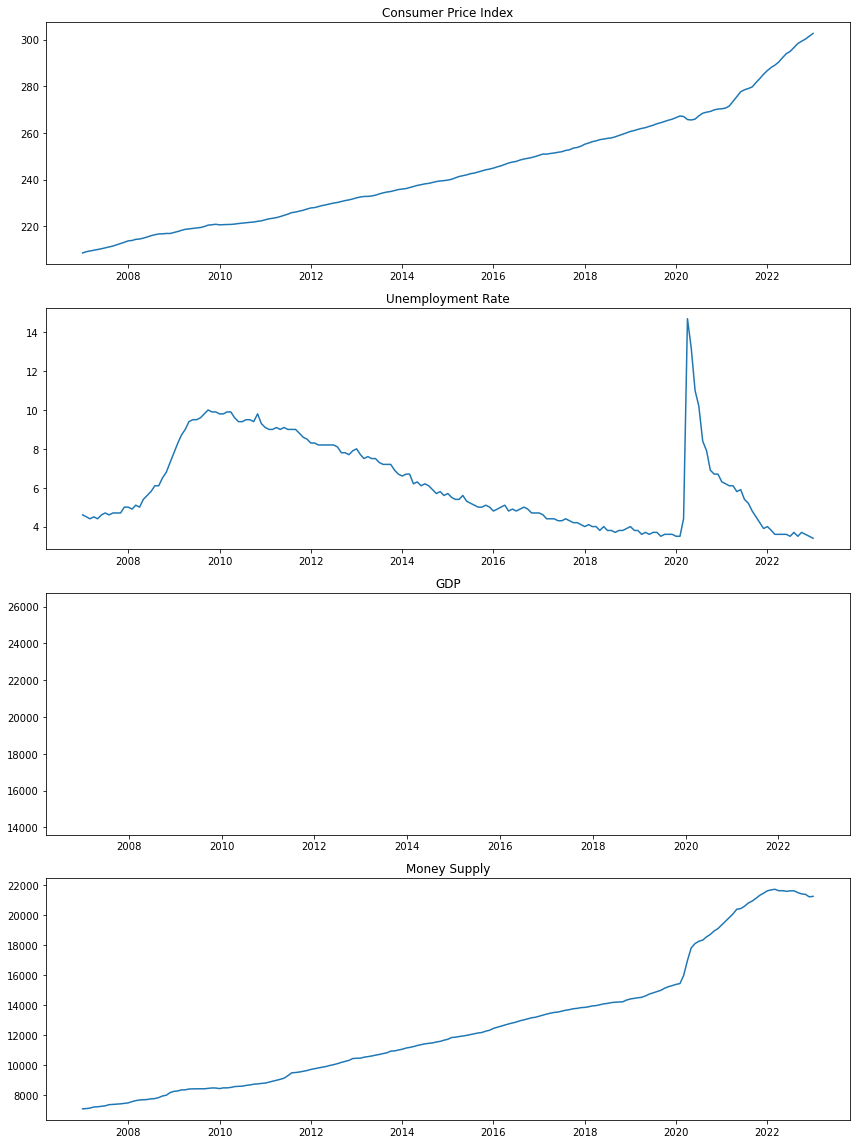

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime

# Define start and end dates
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2023, 1, 1)

# Define list of tickers
tickers = ['CPILFESL', 'UNRATE', 'GDP', 'M2SL']

# Download data from FRED using pandas datareader
df = web.DataReader(tickers, 'fred', start, end)

# Plot each series on a different line chart
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

axs[0].plot(df['CPILFESL'])
axs[0].set_title('Consumer Price Index')

axs[1].plot(df['UNRATE'])
axs[1].set_title('Unemployment Rate')

axs[2].plot(df['GDP'])
axs[2].set_title('GDP')

axs[3].plot(df['M2SL'])
axs[3].set_title('Money Supply')

# Show the plot
plt.tight_layout()
plt.show


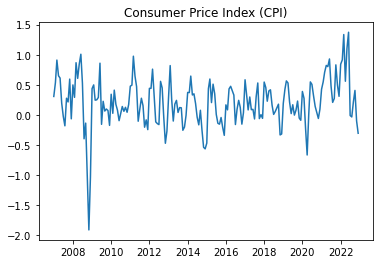

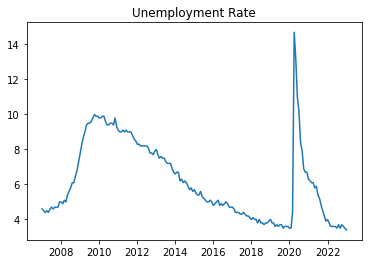

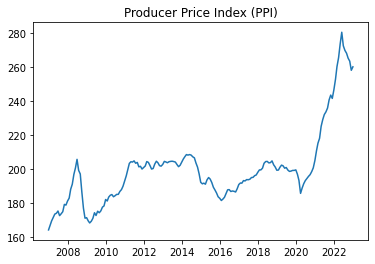

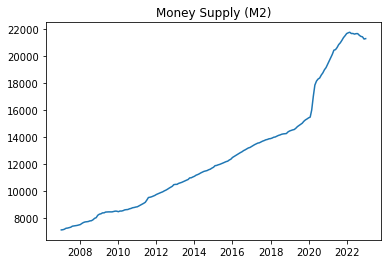

In [13]:
import pandas_datareader as pdr

# set start and end dates
start_date = '2007-01-01'
end_date = '2023-02-01'

# pull the data using pandas datareader
cpi = pdr.data.DataReader('CPALTT01USM657N', 'fred', start_date, end_date).rename(columns={'CPALTT01USM657N': 'CPI'})
unemployment_rate = pdr.data.DataReader('UNRATE', 'fred', start_date, end_date)
producer_price_index = pdr.data.DataReader('PPIACO', 'fred', start_date, end_date)
money_supply = pdr.data.DataReader('M2SL', 'fred', start_date, end_date)

# plot the data
import matplotlib.pyplot as plt

plt.plot(cpi)
plt.title('Consumer Price Index (CPI)')
plt.show()

plt.plot(unemployment_rate)
plt.title('Unemployment Rate')
plt.show()

plt.plot(producer_price_index)
plt.title('Producer Price Index (PPI)')
plt.show()

plt.plot(money_supply)
plt.title('Money Supply (M2)')
plt.show()


In [39]:
import pandas_datareader as pdr
import pandas as pd

# set start and end dates
start_date = '2007-01-01'
end_date = '2023-02-01'

# pull data from FRED
cpi = pdr.get_data_fred('CPALTT01USM657N', start_date, end_date)
unemployment_rate = pdr.get_data_fred('UNRATE', start_date, end_date)
ppi = pdr.get_data_fred('PPIACO', start_date, end_date)
money_supply = pdr.get_data_fred('M2SL', start_date, end_date)

# concatenate the dataframes
combined_data = pd.concat([cpi, unemployment_rate, ppi, money_supply], axis=1)

# rename the columns
combined_data.columns = ['CPI', 'Unemployment Rate', 'PPI', 'Money Supply']

# print the combined data
print(combined_data.head())


                 CPI  Unemployment Rate    PPI  Money Supply
DATE                                                        
2007-01-01  0.305253                4.6  164.0        7109.6
2007-02-01  0.535037                4.5  166.8        7125.3
2007-03-01  0.910570                4.4  169.3        7159.1
2007-04-01  0.649616                4.5  171.4        7231.3
2007-05-01  0.611072                4.4  173.3        7245.4


In [40]:
combined_data.to_csv('fred_data.csv')

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# read in the fred_data.csv file
df = pd.read_csv('fred_data.csv', index_col=0, parse_dates=True)

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(df)

# create a new DataFrame with the standardized data
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)


In [43]:
scaled_df = scaled_df[:-1]
scaled_df.to_csv('fred_data.csv')

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# read in the fred data csv
df = pd.read_csv('fred_data.csv', index_col=0)

# create a VAR model with lag 1
model = VAR(df)
results = model.fit(1)

# print the summary of the model
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Feb, 2023
Time:                     16:50:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -15.5502
Nobs:                     191.000    HQIC:                  -15.7528
Log likelihood:           453.500    FPE:                1.25529e-07
AIC:                     -15.8908    Det(Omega_mle):     1.13202e-07
--------------------------------------------------------------------
Results for equation CPI
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.005563         0.059006           -0.094           0.925
L1.CPI                       0.585465         0.061702            9.489           0.000
L1.Unemployment Rate         0.060

C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
df

CPI  Unemployment Rate       PPI  Money Supply
DATE                                                           
2007-01-01  0.256020          -0.708378 -1.609431     -1.283479
2007-02-01  0.825442          -0.753380 -1.482978     -1.279802
2007-03-01  1.756040          -0.798382 -1.370073     -1.271884
2007-04-01  1.109379          -0.753380 -1.275233     -1.254973
2007-05-01  1.013863          -0.798382 -1.189426     -1.251670
...              ...                ...       ...           ...
2022-08-01 -0.588241          -1.113398  3.157221      2.119322
2022-09-01  0.032562          -1.203403  3.082795      2.091190
2022-10-01  0.504811          -1.113398  2.953090      2.071421
2022-11-01 -0.750711          -1.158400  2.872340      2.063995
2022-12-01 -1.261210          -1.203403  2.630182      2.025487

[192 rows x 4 columns]

In [47]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# define function to check stationarity using ADF test
def test_stationarity(series):
    # perform ADF test
    result = adfuller(series)
    # extract p-value from test results
    p_value = result[1]
    # return True if p-value is less than 0.05, indicating stationarity
    return p_value < 0.05

# define function to make series stationary using differencing
def make_stationary(series):
    # take first difference
    diff = series.diff().dropna()
    # check stationarity of differenced series
    if not test_stationarity(diff):
        # if differenced series is not stationary, take second difference
        diff = diff.diff().dropna()
    # return differenced series
    return diff

# make CPI series stationary
cpi_diff = make_stationary(df['CPI'])

# make unemployment rate series stationary
unemp_diff = make_stationary(df['Unemployment Rate'])

# make PPI series stationary
ppi_diff = make_stationary(df['PPI'])

# make M2 series stationary
m2_diff = make_stationary(df['Money Supply'])

# create new DataFrame with stationary series
stationary_df = pd.concat([cpi_diff, unemp_diff, ppi_diff, m2_diff], axis=1)

# rename columns
stationary_df.columns = ['CPI_diff', 'UNRATE_diff', 'PPI_diff', 'M2_diff']

# display first few rows of stationary_df
stationary_df.head()


CPI_diff  UNRATE_diff  PPI_diff   M2_diff
DATE                                                 
2007-02-01  0.569422    -0.045002  0.126453  0.003678
2007-03-01  0.930598    -0.045002  0.112905  0.007917
2007-04-01 -0.646662     0.045002  0.094840  0.016912
2007-05-01 -0.095516    -0.045002  0.085808  0.003303
2007-06-01 -1.034037     0.090005  0.022581  0.007777

In [48]:
from statsmodels.tsa.api import VAR
nobs = int(len(stationary_df) * 0.8)
train_data, test_data = stationary_df[0:nobs], stationary_df[nobs:]
model = VAR(train_data)
result = model.fit(maxlags=15, ic='aic')

C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Feb, 2023
Time:                     16:58:16
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.0713
Nobs:                     137.000    HQIC:                  -19.1585
Log likelihood:           923.545    FPE:                7.55388e-10
AIC:                     -21.2719    Det(Omega_mle):     1.73138e-10
--------------------------------------------------------------------
Results for equation CPI_diff
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.320171         0.304346            1.052           0.293
L1.CPI_diff            -0.885853         0.201467           -4.397           0.000
L1.UNRATE_diff          0.436104         1.039786

In [52]:
predictions = result.forecast(test_data.values, len(test_data))


In [57]:
predictions

array([[ 1.78618914e+00,  1.21007929e-01,  8.24949264e-02,
         1.26198150e-02],
       [-1.58779146e+00,  4.00365863e-01, -2.66694504e-01,
         2.45314631e-02],
       [-1.46517026e-01, -7.82978550e-02, -2.65661133e-01,
         5.00243221e-03],
       [ 1.48956262e+00,  1.80949530e-01, -1.20924338e-01,
         1.94438440e-02],
       [-2.25342745e-01,  8.86616193e-02, -8.17602793e-02,
         2.22872527e-02],
       [ 9.39008027e-01,  2.50111603e-01,  4.51318255e-03,
         7.93043642e-03],
       [ 2.47674059e+00,  1.09123820e-01,  2.03660775e-01,
         1.63586020e-02],
       [ 1.49908887e+00,  1.06540356e-01,  3.30928757e-01,
         1.56017914e-02],
       [-4.02278380e+00,  1.54934385e-01,  2.40623647e-03,
         9.94215929e-03],
       [-7.77481552e-01, -6.24048292e-02, -7.40964338e-02,
         2.25060025e-02],
       [-9.35743962e-01,  1.55275615e-01, -1.18121720e-01,
         3.22486034e-02],
       [ 2.45710196e-01,  1.74969517e-01, -8.72902261e-02,
      

In [54]:
data = stationary_df

In [55]:
import pickle
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit VAR model
model = VAR(data)
results = model.fit(maxlags=2)

# Save model to pickle file
with open('var_model.pkl', 'wb') as f:
    pickle.dump(results, f)

C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
import pickle

with open('var_model.pkl', 'rb') as f:
    var_model = pickle.load(f)


In [2]:
import pandas as pd
import pickle
from statsmodels.tsa.vector_ar.var_model import VARResults

# Load in the trained VAR model from a pickled file
with open('var_model.pkl', 'rb') as f:
    var_model = pickle.load(f)

data = pd.read_csv('fred_data.csv', index_col=0, parse_dates=True)
# Define the number of steps to forecast
n_steps = 12

# Get the last available data point from the dataset to start the forecast
last_data = data.iloc[-1]

# Forecast n_steps ahead
forecast = var_model.forecast(last_data.values.reshape(1, -1), steps=n_steps)

# Create a date range for the forecasted period
forecast_range = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_steps, freq='MS')

# Create a DataFrame of the forecasted values with the date range as index and column names
forecast_df = pd.DataFrame(forecast, index=forecast_range, columns=data.columns)

# Concatenate the original data with the forecasted data
forecasted_data = pd.concat([data, forecast_df])

# Plot the original data and forecasted data on a line chart
forecasted_data.plot(figsize=(10, 6), title='Forecasted Data')


ValueError: y must by have at least order (2) observations. Got 1.

In [28]:
entry=data.iloc[-12:].values

In [29]:
entry

array([[ 1.58477503, -0.97839122,  2.11429871,  2.12023548],
       [ 1.76304904, -1.06839575,  2.39461829,  2.13393832],
       [ 2.80815209, -1.15840028,  2.72673852,  2.14326093],
       [ 0.88297384, -1.15840028,  2.96591567,  2.12091476],
       [ 2.23129223, -1.15840028,  3.3245459 ,  2.12166432],
       [ 2.90348267, -1.15840028,  3.64067884,  2.11117052],
       [-0.52968953, -1.20340255,  3.28042278,  2.11890033],
       [-0.5882415 , -1.11339802,  3.15722126,  2.11932196],
       [ 0.03256161, -1.20340255,  3.08279453,  2.09119015],
       [ 0.50481066, -1.11339802,  2.95308971,  2.07142058],
       [-0.75071077, -1.15840028,  2.87234032,  2.06399529],
       [-1.26121015, -1.20340255,  2.63018249,  2.0254868 ]])

In [30]:
with open('var_model.pkl', 'rb') as f:
    var_model = pickle.load(f)
    
var_model.forecast(entry,4)

array([[ 6.67053903, -0.50130498,  3.42261981,  1.60676916],
       [ 5.55662153, -5.21067499,  3.82488085,  1.19075165],
       [ 0.38228354, -3.89334501,  3.53510914,  0.85836571],
       [-1.46379683, -3.10132122,  3.23100496,  0.68372285]])